In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Electric_Production.csv", parse_dates=["DATE"], index_col="DATE")
print(data.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


In [ ]:
data.fillna(method="ffill", inplace=True)
data.drop_duplicates(inplace=True)

<ipython-input-26-4e3b22b49825>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


In [ ]:
from scipy.stats import zscore
print(data.columns)

column_name = data.columns[0]

data[column_name] = pd.to_numeric(data[column_name], errors='coerce')

Index(['IPG2211A2N'], dtype='object')


In [ ]:
z_scores = zscore(data[column_name])

data = data[abs(z_scores) < 3]
data["Normalized_Value"] = (data[column_name] - data[column_name].min()) / (data[column_name].max() - data[column_name].min())

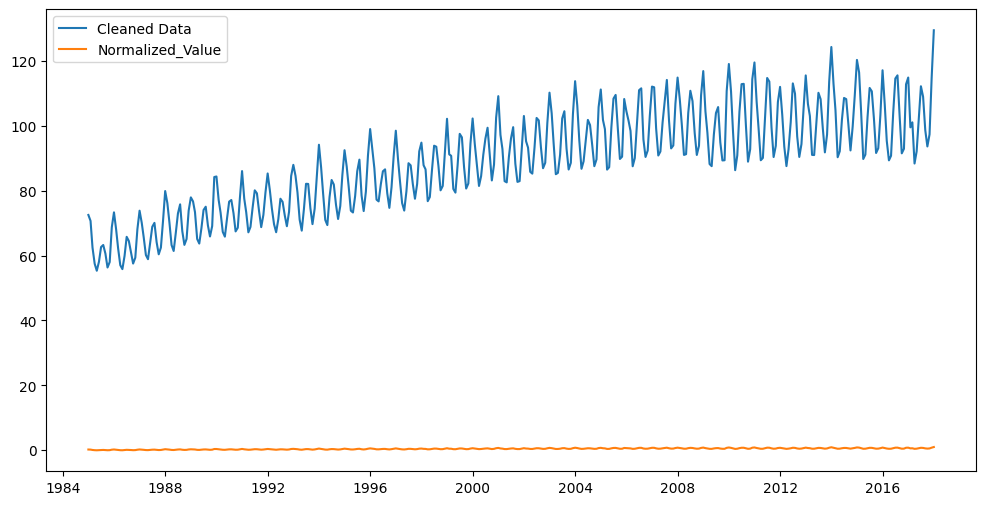

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data[column_name], label="Cleaned Data")
plt.plot(data['Normalized_Value'], label="Normalized_Value")
plt.legend()
plt.show()